# ANLY-590 Aissgnment 1
## Cheng Zhong

## 1. Feedforward: Building a ReLu 2 Layer neural network

### 1.1 Plot the network

![title](hw1.png)

### 1.2 Write out the mathematical equation for this network

$a_{11} = w_{111}x_{1}+w_{121}x_{2}+b_{11}$

$h_{11} = max(0,a_{11})$

$a_{12} = w_{112}x_{1}+w_{122}x_{2}+b_{12}$

$h_{12} = max(0,a_{12})$

$a_{13} = w_{113}x_{1}+w_{123}x_{2}+b_{13}$

$h_{13} = max(0,a_{13})$

$a_{21} = w_{211}h_{11}+w_{221}h_{12}+w_{231}h_{13}+b_{21}$

$h_{21} = max(0,a_{21})$

$a_{22} = w_{212}h_{11}+w_{222}h_{12}+w_{232}h_{13}+b_{22}$

$h_{22} = max(0,a_{22})$

$a_{31} = w_{311}h{21}+w_{321}h{22}+c_{1}$

$y_{1} = softmax(a_{31})$

$a_{32} = w_{312}h{21}+w_{322}h{22}+c_{2}$

$y_{2} = softmax(a_{32})$

$a_{33} = w_{313}h{21}+w_{323}h{22}+c_{3}$

$y_{3} = softmax(a_{33})$


### 1.3 Write out the function in python, call it ff_nn_2_reLu(...)

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

def ReLu(z):
    return np.maximum(0, z)

def ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c):
    a_1 = np.dot(w_1, x) + b_1
    h_1 = ReLu(a_1)
    a_2 = np.dot(w_2, h_1) + b_2
    h_2 = ReLu(a_2)
    y = np.dot(v, h_2) + c
    return softmax(y)

### 1.4 Class Probabilities

In [3]:
x = np.array([[1,0,0],[-1,-1,1]])
w_1 = np.array([[1,0],[-1,0],[0,0.5]])
w_2 = np.array([[1,0,0],[-1,-1,0]])
v = np.array([[1,1],[0,0],[-1,-1]])
b_1 = np.array([0,0,1])
b_2 = np.array([1,-1])
c = np.array([1,0,0])

b_1 = np.array([[0],[0],[1]])
b_2 = np.array([[1],[-1]])
c = np.array([[1],[0],[0]])

print(ff_nn_2_ReLu(x,w_1,w_2,v,b_1,b_2,c))

[[0.57611688 0.21194156 0.21194156]
 [0.33333333 0.33333333 0.33333333]
 [0.1553624  0.4223188  0.4223188 ]]


## 2 Gradient Descent

### 2.1 Partial Derivatives

Since $f(x,y) = (1-x)^2+100*(y-x^2)^2$, we can get 

$\frac{\partial f(x,y)}{\partial x} = -2(1-x)-400x(y-x^2) = 400x^3-400xy+2x-2$

$\frac{\partial f(x,y)}{\partial y} = 200y-200x^2$

### 2.2 Visualization of the contours of the Rosenbrock function

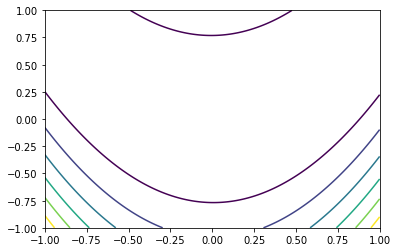

In [4]:
delta=0.001
x=np.arange(-1, 1, delta)
y=np.arange(-1, 1, delta)
X,Y=np.meshgrid(x,y)
Z=(1-X)**2 + 100*(Y-X**2)**2
fig,ax=plt.subplots()
ax.contour(X,Y,Z)

### 2.3 Gradient Descent algorithm for finding the minimum

In [5]:
# --- Defining gradient ----
def grad_f(vector):
    x, y = vector
    df_dx = 400*x**3-400*x*y+2*x-2 
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])

# --- Grad Descent ----
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        #print(grad)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

When using different learning rate from $[0.00001, 0.0001, 0.001]$.

[[ 0.54264129 -0.9584961 ]
 [ 0.53993081 -0.95599019]
 [ 0.53724573 -0.95349516]
 ...
 [ 0.22320348  0.04695771]
 [ 0.22321646  0.04696343]
 [ 0.22322944  0.04696916]]
[[0.26729647 0.49760777]
 [0.27199946 0.48908456]
 [0.27666135 0.48078254]
 ...
 [0.75309437 0.56601218]
 [0.75310945 0.56603496]
 [0.75312452 0.56605774]]
[[-2.98597539e-03 -5.50406709e-01]
 [-3.22592439e-04 -4.40323584e-01]
 [ 1.73487078e-03 -3.52258846e-01]
 ...
 [ 9.94387228e-01  9.88783422e-01]
 [ 9.94389489e-01  9.88787929e-01]
 [ 9.94391750e-01  9.88792435e-01]]


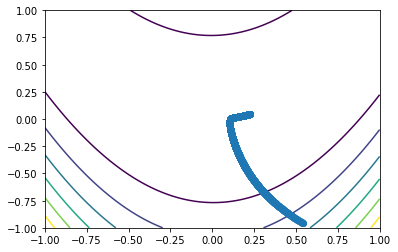

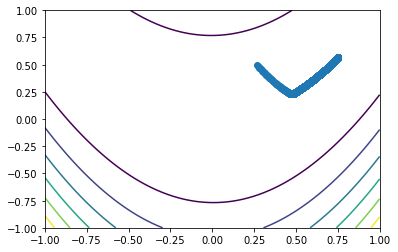

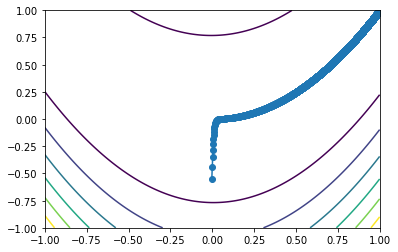

In [6]:
np.random.seed(10)
learning_rate_list = [0.00001, 0.0001, 0.001]
for i in learning_rate_list:
    traj = grad_descent(iterations=10000,learning_rate=i)
    print(traj)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

### 2.4 Gradient Descent With Momentum

[[ 0.54264129 -0.9584961 ]
 [ 0.51553654 -0.93343699]
 [ 0.48819339 -0.90694678]
 [ 0.46319672 -0.88139217]
 [ 0.44049892 -0.85691784]
 [ 0.41982322 -0.83345126]
 [ 0.40091582 -0.81091055]
 [ 0.383563   -0.7892236 ]
 [ 0.36758512 -0.76832802]
 [ 0.35283008 -0.74816952]
 [ 0.339168   -0.7287005 ]
 [ 0.32648723 -0.70987889]
 [ 0.31469114 -0.69166727]
 [ 0.30369557 -0.67403216]
 [ 0.29342684 -0.65694338]
 [ 0.28382014 -0.64037365]
 [ 0.27481816 -0.62429813]
 [ 0.26637003 -0.60869411]
 [ 0.25843044 -0.59354077]
 [ 0.25095885 -0.57881889]
 [ 0.24391889 -0.56451072]
 [ 0.23727782 -0.55059976]
 [ 0.2310061  -0.53707065]
 [ 0.22507697 -0.52390905]
 [ 0.21946615 -0.51110152]
 [ 0.21415157 -0.49863543]
 [ 0.20911309 -0.48649889]
 [ 0.20433233 -0.47468069]
 [ 0.19979243 -0.46317023]
 [ 0.19547796 -0.45195744]
 [ 0.19137473 -0.44103278]
 [ 0.18746967 -0.43038717]
 [ 0.18375074 -0.42001197]
 [ 0.18020683 -0.40989892]
 [ 0.17682765 -0.40004015]
 [ 0.17360368 -0.39042811]
 [ 0.17052609 -0.38105558]
 

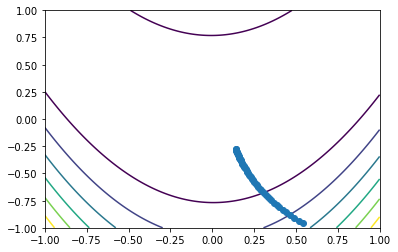

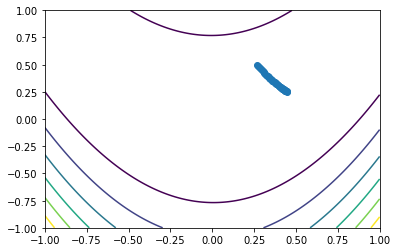

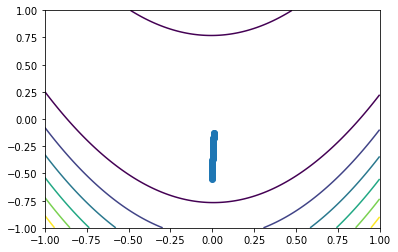

In [7]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

np.random.seed(10)
alphas = [.1,.2,.3]
for i in alphas:
    traj = grad_descent_with_momentum(iterations=50, epsilon=0.0001, alpha=i)
    print(traj)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

## 3 Backprop

### 3.1 

Suppose the weight matrix and bias vector are:

$
W_1 = \begin{pmatrix} w_{11}^{1} & w_{12}^{1} \\  w_{21}^{1} & w_{22}^{1} \\ w_{31}^{1} & w_{32}^{1} \end{pmatrix}
$

$
W_2 = \begin{pmatrix} w_{11}^{2} & w_{12}^{2} & w_{13}^{2}\\ w_{21}^{2} & w_{22}^{2} & w_{23}^{2} \end{pmatrix}
$

$
V = \begin{pmatrix} v_{11} & v_{12} \\  v_{21} & v_{22} \\ v_{31} & v_{32} \end{pmatrix}
$

$
b^{1} = [b_1, b_2, b_3]^T \\
b^{2} = [b_3, b_4]^T \\
c = [c_1,c_2,c_3 ]^T \\
$

$
X = \begin{pmatrix} x_{11} \\ x_{21}  \end{pmatrix}
$
$
h_1 = \begin{pmatrix} h_{11}^1 \\ h_{21}^1 \\h_{31}^1 \end{pmatrix}
$
$
h_2 = \begin{pmatrix} h_{11}^2 \\ h_{21}^2\end{pmatrix}
$
$
Y = \begin{pmatrix} y_{11} \\ y_{21} \\y_{31} \end{pmatrix}
$

Then, if we input a X with shape (2, n), then we can see the shape of following parameters are:
$y \Rightarrow (3,n), \hat y \Rightarrow  (3,n), W_1\Rightarrow  (3,2), W_2\Rightarrow  (2,3), V\Rightarrow  (3,2), h_1\Rightarrow  (3,n), h_2\Rightarrow  (2,n),\\ b^1\Rightarrow  (3,1), b^2\Rightarrow  (2,1), c\Rightarrow  (3,1), a_1\Rightarrow  (3,n), a_2\Rightarrow  (2,n), X\Rightarrow  (2,n)$ 

When n =1

$\frac{\partial L}{\partial c} = \hat y - y$


$\frac{\partial L}{\partial V} = (h_2(\hat y - y)^T)^T$

$\frac{\partial L}{\partial W_2} = ((\hat y - y)^T V)^T \cdot max^{'}(0,a_2) h_1^T)^T = ((\hat y - y)^T V)^T \cdot I_{h_2>0} h_1^T)^T$

$\frac{\partial L}{\partial b_2} = ((\hat y - y)^T V)^T \cdot max^{'}(0,a_2) = ((\hat y - y)^T V)^T \cdot I_{h_2>0}$

$\frac{\partial L}{\partial W_1} = (W_2^T((\hat y - y)^T V)^T \cdot max^{'}(0,a_2))) \cdot max^{'}(0,a_1) X^T $

$\frac{\partial L}{\partial b_1} = (W_2^T((\hat y - y)^T V)^T \cdot max^{'}(0,a_2))) \cdot max^{'}(0,a_1)$


### 3.2 Gradient Loss

In [103]:
def params_to_vec(w_1, w_2, v, b_1, b_2, c):
    w1_11 = w_1[0,0] 
    w1_12 = w_1[0,1]
    w1_21 = w_1[1,0] 
    w1_22 = w_1[1,1] 
    w1_31 = w_1[2,0] 
    w1_32 = w_1[2,1]
    b1_1 = np.squeeze(b_1[0])
    b1_2 = np.squeeze(b_1[1])
    b1_3 = np.squeeze(b_1[2]) 
    w2_11 = w_2[0,0]
    w2_12 = w_2[0,1]
    w2_13 = w_2[0,2]
    w2_21 = w_2[1,0]
    w2_22 = w_2[1,1]
    w2_23 = w_2[1,2]
    b2_1 = np.squeeze(b_2[0])
    b2_2 = np.squeeze(b_2[1])
    v_11, v_12, v_21, v_22, v_31, v_32 = v[0,0], v[0,1], v[1,0], v[1,1], v[2,0], v[2,1]
    c_1, c_2, c_3 = np.squeeze(c[0]), np.squeeze(c[1]), np.squeeze(c[2])
    return np.array([w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, b1_1, b1_2, b1_3, w2_11, w2_12, w2_13, w2_21, w2_22, w2_23
                     ,b2_1, b2_2, v_11, v_12, v_21, v_22, v_31, v_32, c_1, c_2, c_3])

def vec_to_params(param_vec):
    w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, b1_1, b1_2, b1_3, \
    w2_11, w2_12, w2_13, w2_21, w2_22, w2_23, b2_1, b2_2, \
    v_11, v_12, v_21, v_22, v_31, v_32, c_1, c_2, c_3 = param_vec
    w_1 = np.array([[w1_11, w1_12],[w1_21, w1_22], [w1_31, w1_32]])
    b_1 = np.array([[b1_1],[b1_2],[b1_3]])
    w_2 = np.array([[w2_11, w2_12, w2_13], [w2_21, w2_22, w2_23]])
    b_2 = np.array([[b2_1], [b2_2]])
    v = np.array([[v_11, v_12],[v_21, v_22], [v_31, v_32]])
    c = np.array([[c_1], [c_2], [c_3]])
    return ((w_1, w_2, v, b_1, b_2, c))

In [104]:
def grad_f(param_vec, x, y):
    x = x.T # x.shape = (2,n)
    w_1, w_2, v, b_1, b_2, c = pack_params(param_vec) 
    z_1 = np.dot(w_1, x) + b_1 #(3,n)
    h_1 = ReLu(z_1) #(3,n)
    z_2 = np.dot(w_2, h_1) + b_2 #(2,n)
    h_2 = ReLu(z_2) #(2,n)
    z_3 = np.dot(v, h_2) + c #(3,n)
    y_hat = softmax(z_3).T #(n, 3)
    
    d_v = h_2.dot((y_hat-y)).T
    d_c = (y_hat-y).sum(axis = 0).reshape(3,1)
    d_w2 = (((y_hat-y).dot(v)).T * (h_2 > 0)).dot(h_1.T)
    d_b2 = (((y_hat - y).dot(v)).T * (h_2 > 0)).sum(axis=1).reshape(2,1)
    d_w1 = ((w_2.T.dot(  (((y_hat-y).dot(v)).T * (h_2 > 0))  )) * (h_1 > 0)).dot(x.T)
    d_b1 = ((w_2.T.dot(  (((y_hat-y).dot(v)).T * (h_2 > 0))  )) * (h_1 > 0)).sum(axis = 1).reshape(3,1)
    
    param_vec = params_to_vec(d_w1, d_w2, d_v, d_b1, d_b2, d_c)
    
    return np.array(param_vec)

### 3.3 Generate Dataset

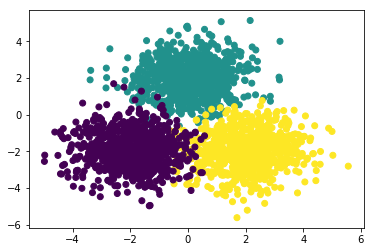

In [105]:
x1 = np.random.multivariate_normal([0,2],[[1,0],[0,1]], 800)
x2 = np.random.multivariate_normal([2,-2],[[1,0],[0,1]], 800)
x3 = np.random.multivariate_normal([-2,-2],[[1,0],[0,1]], 800)
x= np.concatenate((x1,x2,x3))
class_code = np.zeros(2400)
class_code[:800] = 1
class_code[800:1600] = 2
class_code[2400:] = 3

y = np.array([1,0,0]*800 + [0,1,0]*800 + [0,0,1]*800).reshape(2400,3)
plt.scatter(x[:,0], x[:,1], c=class_code)
plt.show()
plt.close()

### 3.4 Fit using Gradient Descent

Since we are doing the classification, we are using cross entropy loss funciton here. 

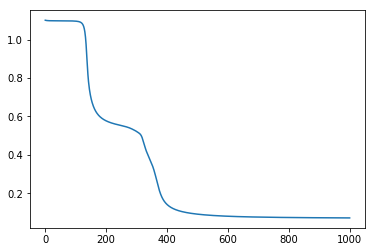

For iteration 0 :  1.1013894020486072
For iteration 1 :  1.1009774319671108
For iteration 2 :  1.100625627077057
For iteration 3 :  1.100325323836577
For iteration 4 :  1.1000690664283301
For iteration 5 :  1.0998504405534761
For iteration 6 :  1.099663943791541
For iteration 7 :  1.0995048545981945
For iteration 8 :  1.0993691276709385
For iteration 9 :  1.0992533071386565


In [106]:
# cross entropy loss function
def loss(y, y_hat):
    tot = y * np.log(y_hat)
    return  -tot.sum()/len(y)

def grad_descent(x, y, iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=26)
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x.T, *vec_to_params(point)).T)]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x.T, *vec_to_params(point)).T))
    return (np.array(trajectory), losses)

traj, losses = grad_descent(x, y, iterations=1000,learning_rate=0.0001)
plt.plot(losses)
plt.show()

for i in range(len(losses))[:10]:
    print("For iteration",i,": ",losses[i])

### 3.5 Repeat using Momentum

For iteration 0 :  1.1008412727270251127
For iteration 1 :  1.1004586844034159001
For iteration 2 :  1.09999475919261926
For iteration 3 :  1.0996019512856871344
For iteration 4 :  1.0992791062775323025
For iteration 5 :  1.0990222685005425337
For iteration 6 :  1.0988235239678561633
For iteration 7 :  1.0986664077059728949
For iteration 8 :  1.0985383937660214261
For iteration 9 :  1.0984240576805881447


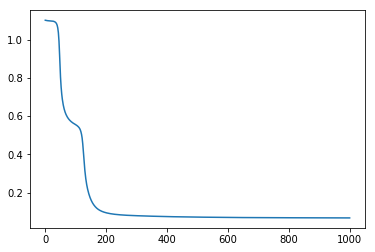

In [107]:
def grad_descent_with_momentum(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=1e-4):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=26).astype("float128")
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x.T, *vec_to_params(point)).T)]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x.T, *vec_to_params(point)).T))
    return (np.array(trajectory), losses)

traj, losses = grad_descent_with_momentum(x, y, iterations=1000,alpha=.4, epsilon = 1e-4)
plt.plot(losses)

for i in range(len(losses))[:10]:
    print("For iteration",i,": ",losses[i])

From the plot, we can see that the algorithms converges more efficiently than previous one. 